In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#importing MNIST fashion dataset stored in the drive
import numpy as np
import pandas as pd
Train=pd.read_csv("/content/drive/MyDrive/mnist_train.csv")
Test=pd.read_csv("/content/drive/MyDrive/mnist_test.csv")

In [4]:
Train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
Test, Train.shape, Test.shape

(      label  1x1  1x2  1x3  1x4  1x5  ...  28x23  28x24  28x25  28x26  28x27  28x28
 0         7    0    0    0    0    0  ...      0      0      0      0      0      0
 1         2    0    0    0    0    0  ...      0      0      0      0      0      0
 2         1    0    0    0    0    0  ...      0      0      0      0      0      0
 3         0    0    0    0    0    0  ...      0      0      0      0      0      0
 4         4    0    0    0    0    0  ...      0      0      0      0      0      0
 ...     ...  ...  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
 9995      2    0    0    0    0    0  ...      0      0      0      0      0      0
 9996      3    0    0    0    0    0  ...      0      0      0      0      0      0
 9997      4    0    0    0    0    0  ...      0      0      0      0      0      0
 9998      5    0    0    0    0    0  ...      0      0      0      0      0      0
 9999      6    0    0    0    0    0  ...      0      0      0  

In [6]:
#getting the Data(X) and label(Y) from Train and Test
TrainX= np.array(Train.iloc[:,1:])
TrainY= np.array (Train.iloc[:,0])
TrainX.shape, TrainY.shape

((60000, 784), (60000,))

In [7]:
TestX= np.array(Test.iloc[:,1:])
TestY = np.array(Test.iloc[:,0]) 
TestX.shape, TestY.shape

((10000, 784), (10000,))

In [8]:
#getting classes out of  Train label
classes = np.unique(TrainY)
classes_N = len(classes)
classes_N

10

In [9]:
#converting images Data X into 3 channels as equired by the model
TrainX=np.dstack([TrainX] * 3)
TestX=np.dstack([TestX]*3)


In [10]:
TrainX.shape,TestX.shape

((60000, 784, 3), (10000, 784, 3))

In [11]:
# According reshaping it in tensor format
TrainX = TrainX.reshape(-1, 28,28,3)
TestX= TestX.reshape (-1,28,28,3)


In [12]:
TrainX, TestX ,TrainX.shape,TestX.shape

(array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],
 
 
        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0

In [13]:
# Resizing the images Data 48*48 as per requirement of VGG16 model
from keras.preprocessing.image import img_to_array, array_to_img
TrainX = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in TrainX])

TestX = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in TestX])


In [14]:

TrainX.shape, TestX.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [15]:
# Normalising the images data 
TrainX = TrainX / 255.
testX = TestX / 255.

In [16]:
#changing the datatype to float
TrainX = TrainX.astype('float32')
TestX = TestX.astype('float32')

In [17]:
TrainX

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [18]:
#Converting the labels(Y) by one hot encoding

from tensorflow.keras.utils import to_categorical

TrainY_OH = to_categorical(TrainY)
TestY_OH = to_categorical(TestY)

In [19]:
#Splitting the train data of images and label into train and validation data
from sklearn.model_selection import train_test_split
TrainX,ValidX,Train_Y,Valid_Y = train_test_split(TrainX,
                                                           TrainY_OH,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [20]:
TrainX.shape,ValidX.shape

((48000, 48, 48, 3), (12000, 48, 48, 3))

In [21]:
Train_Y.shape,Valid_Y.shape

((48000, 10), (12000, 10))

In [22]:
#Prepocessing Data and label inputs

from keras.applications.vgg16 import preprocess_input

TrainX = preprocess_input(TrainX)

ValidX = preprocess_input(ValidX)

TestX  = preprocess_input (TestX)

In [23]:
#  Creating a base model of VGG16
IMAGE_WIDTH = 48
IMAGE_HEIGHT = 48
IMAGE_DEPTH = 3
BATCH_SIZE = 16

from tensorflow.keras.applications import VGG16;

base_model = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_DEPTH)
                 )
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [25]:
# Extracting features
Train_F = base_model.predict(np.array(TrainX), batch_size=BATCH_SIZE, verbose=1)
Test_F = base_model.predict(np.array(TestX), batch_size=BATCH_SIZE, verbose=1)
Val_F = base_model.predict(np.array(ValidX), batch_size=BATCH_SIZE, verbose=1)


750/750 [==============================] - 293s 391ms/step


In [26]:
#saving fetures
np.savez("Train_F", Train_F, Train_Y)
np.savez("Test_F", Test_F, TestY)
np.savez("Val_F", Val_F, Valid_Y)

In [27]:
Train_F.shape,Test_F.shape, Val_F.shape

((48000, 1, 1, 512), (10000, 1, 1, 512), (12000, 1, 1, 512))

In [28]:
#Flattening the extracted Features
Train_Fflat = np.reshape(Train_F, (48000, 1*1*512))
Test_Fflat = np.reshape(Test_F, (10000, 1*1*512))
Val_Fflat = np.reshape(Val_F, (12000, 1*1*512))

In [29]:
TRAIN_SAMPLES = Train_Fflat.shape[0]
VALIDATION_SAMPLES = Val_Fflat.shape[0]
EPOCHS = 200




In [30]:
# adding  densely connected classifier and leakyrelu layer and dense layer for the number of classes in the model

from keras import models

model = models.Sequential()

from keras import layers
model.add(layers.Dense(512, activation='relu', input_dim=(1*1*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(classes_N, activation='softmax'))

**Optimizing Using Adam** 

In [69]:
import tensorflow as tf

# Compiling  the model.

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
  # optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

In [70]:
# For callback option incorporating early stopping and reduced learning 


from keras import callbacks
ReduceLearning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

EarlyStopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [ReduceLearning,EarlyStopping]

In [71]:
# Training  the the model

history= model.fit(
    Train_Fflat,
    Train_Y,
    epochs=EPOCHS,
    validation_data=(Val_Fflat, Valid_Y),
    callbacks=callbacks
)

Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6376 - acc: 0.7844 - val_loss: 0.6513 - val_acc: 0.7771 - lr: 0.0010
Epoch 2/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6384 - acc: 0.7855 - val_loss: 0.6386 - val_acc: 0.7815 - lr: 0.0010
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6331 - acc: 0.7876 - val_loss: 0.6363 - val_acc: 0.7812 - lr: 0.0010
Epoch 4/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6325 - acc: 0.7871 - val_loss: 0.6321 - val_acc: 0.7857 - lr: 0.0010
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6295 - acc: 0.7885 - val_loss: 0.6390 - val_acc: 0.7801 - lr: 0.0010
Epoch 6/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6310 - acc: 0.7865 - val_loss: 0.6285 - val_acc: 0.7863 - lr: 0.0010
Epoch 7/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6298 - acc: 0.7883 - val_loss: 0.

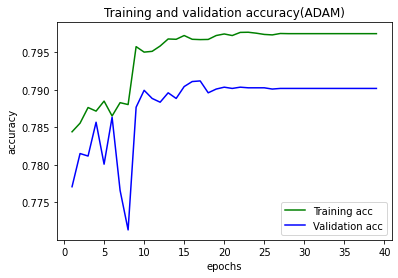

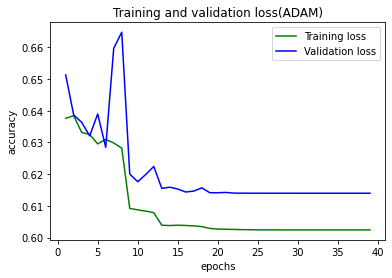

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
from google.colab import files
# plot the loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.title('Training and validation accuracy(ADAM)')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

test=plt.figure()


plt.title('Training and validation loss(ADAM)')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()




plt.show()
test.savefig('ADAML.png',  bbox_inches="tight")
files.download('ADAML.png')




**Optimizing using RMSprop**

In [82]:

import tensorflow as tf

# Compiling  the model.

model.compile(
    loss='categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc'])


In [83]:
# For callback option incorporating early stopping and reduced learning 


from keras import callbacks
ReduceLearning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

EarlyStopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [ReduceLearning,EarlyStopping]

In [84]:
# Training  the the model

history = model.fit(
    Train_Fflat,
    Train_Y,
    epochs=EPOCHS,
    validation_data=(Val_Fflat, Valid_Y),
    callbacks=callbacks
)

Epoch 1/200
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6030 - acc: 0.7976 - val_loss: 0.6143 - val_acc: 0.7888 - lr: 2.0000e-05
Epoch 2/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6029 - acc: 0.7969 - val_loss: 0.6144 - val_acc: 0.7915 - lr: 2.0000e-05
Epoch 3/200
1495/1500 [============================>.] - ETA: 0s - loss: 0.6029 - acc: 0.7971
Epoch 00003: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6029 - acc: 0.7972 - val_loss: 0.6145 - val_acc: 0.7904 - lr: 2.0000e-05
Epoch 4/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6026 - acc: 0.7972 - val_loss: 0.6138 - val_acc: 0.7901 - lr: 4.0000e-06
Epoch 5/200
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6025 - acc: 0.7975 - val_loss: 0.6139 - val_acc: 0.7901 - lr: 4.0000e-06
Epoch 6/200
1498/1500 [============================>.] - ETA: 0s - loss: 0.60

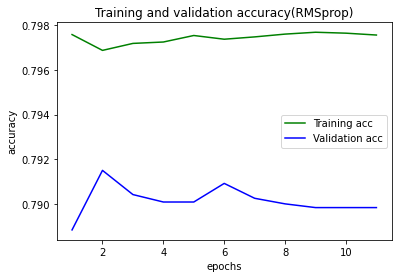

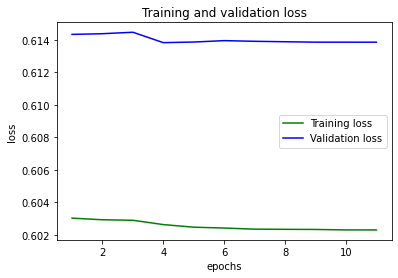

In [85]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy(RMSprop)')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")


plt.legend()

plt.show()

**Optiizing Using Adagrad**

In [86]:

import tensorflow as tf

# Compiling  the model.

model.compile(
    loss='categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(),
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=2e-5),
    metrics=['acc'])



In [87]:
# For callback option incorporating early stopping and reduced learning 


from keras import callbacks
ReduceLearning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

EarlyStopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [ReduceLearning,EarlyStopping]

In [88]:
# Training  the the model

history = model.fit(
    Train_Fflat,
    Train_Y,
    epochs=EPOCHS,
    validation_data=(Val_Fflat, Valid_Y),
    callbacks=callbacks
)

Epoch 1/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6024 - acc: 0.7974 - val_loss: 0.6139 - val_acc: 0.7897 - lr: 2.0000e-05
Epoch 2/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6023 - acc: 0.7975 - val_loss: 0.6139 - val_acc: 0.7897 - lr: 2.0000e-05
Epoch 3/200
1493/1500 [============================>.] - ETA: 0s - loss: 0.6023 - acc: 0.7977
Epoch 00003: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6023 - acc: 0.7975 - val_loss: 0.6139 - val_acc: 0.7897 - lr: 2.0000e-05
Epoch 4/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6023 - acc: 0.7975 - val_loss: 0.6139 - val_acc: 0.7897 - lr: 4.0000e-06
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6023 - acc: 0.7975 - val_loss: 0.6139 - val_acc: 0.7897 - lr: 4.0000e-06
Epoch 6/200
1499/1500 [============================>.] - ETA: 0s - loss: 0.602

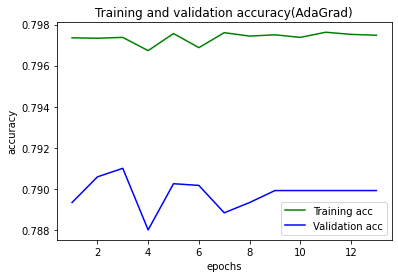

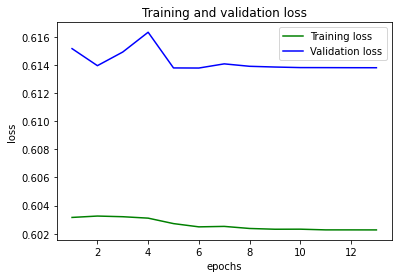

In [93]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy(AdaGrad)')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

**Optimizing Using SGD**

In [95]:

import tensorflow as tf

# Compiling  the model.

model.compile(
    loss='categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=2e-5),
    metrics=['acc'])

In [96]:
# For callback option incorporating early stopping and reduced learning 


from keras import callbacks
ReduceLearning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

EarlyStopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [ReduceLearning,EarlyStopping]

In [97]:
# Training  the the model

history = model.fit(
    Train_Fflat,
    Train_Y,
    epochs=EPOCHS,
    validation_data=(Val_Fflat, Valid_Y),
    callbacks=callbacks
)

Epoch 1/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6034 - acc: 0.7977 - val_loss: 0.6143 - val_acc: 0.7894 - lr: 2.0000e-05
Epoch 2/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6032 - acc: 0.7972 - val_loss: 0.6145 - val_acc: 0.7902 - lr: 2.0000e-05
Epoch 3/200
1489/1500 [============================>.] - ETA: 0s - loss: 0.6031 - acc: 0.7975
Epoch 00003: ReduceLROnPlateau reducing learning rate to 3.999999898951501e-06.
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6032 - acc: 0.7977 - val_loss: 0.6143 - val_acc: 0.7891 - lr: 2.0000e-05
Epoch 4/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6026 - acc: 0.7977 - val_loss: 0.6139 - val_acc: 0.7899 - lr: 4.0000e-06
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6024 - acc: 0.7973 - val_loss: 0.6141 - val_acc: 0.7897 - lr: 4.0000e-06
Epoch 6/200
1487/1500 [============================>.] - ETA: 0s - loss: 0.603

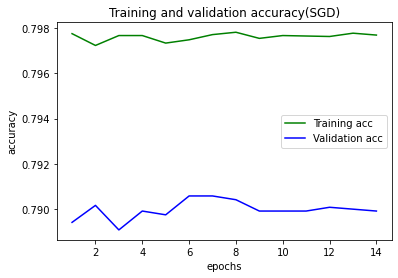

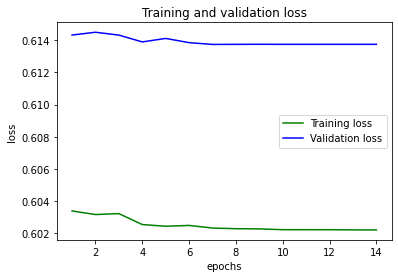

In [98]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy(SGD)')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend()

plt.show()

**Optimizing using Nesterov Accelerated Gradient**

In [99]:

import tensorflow as tf

# Compiling  the model.

model.compile(
    loss='categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    metrics=['acc'])

In [100]:
# For callback option incorporating early stopping and reduced learning 


from keras import callbacks
ReduceLearning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

EarlyStopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [ReduceLearning,EarlyStopping]

In [101]:
# Training  the the model

history = model.fit(
    Train_Fflat,
    Train_Y,
    epochs=EPOCHS,
    validation_data=(Val_Fflat, Valid_Y),
    callbacks=callbacks
)

Epoch 1/200
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0399 - acc: 0.6435 - val_loss: 0.8507 - val_acc: 0.7055 - lr: 0.0010
Epoch 2/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9133 - acc: 0.6827 - val_loss: 0.7846 - val_acc: 0.7377 - lr: 0.0010
Epoch 3/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8837 - acc: 0.6961 - val_loss: 0.8478 - val_acc: 0.7146 - lr: 0.0010
Epoch 4/200
1497/1500 [============================>.] - ETA: 0s - loss: 0.8710 - acc: 0.6971
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8707 - acc: 0.6973 - val_loss: 0.7941 - val_acc: 0.7284 - lr: 0.0010
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7729 - acc: 0.7411 - val_loss: 0.7999 - val_acc: 0.7280 - lr: 2.0000e-04
Epoch 6/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7681 - acc: 0.

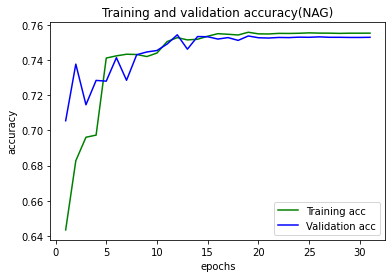

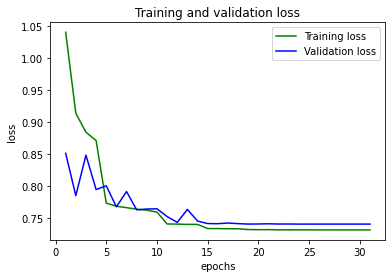

In [102]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy(NAG)')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()

In [104]:

[acc, loss, val_acc, val_loss]

[[0.6434583067893982,
  0.6827499866485596,
  0.6961249709129333,
  0.6973333358764648,
  0.7411249876022339,
  0.7423750162124634,
  0.7432916760444641,
  0.7431458234786987,
  0.74197918176651,
  0.7439791560173035,
  0.7505000233650208,
  0.7527291774749756,
  0.7514374852180481,
  0.7518125176429749,
  0.7535208463668823,
  0.7549791932106018,
  0.754645824432373,
  0.7542291879653931,
  0.7557916641235352,
  0.7548750042915344,
  0.754812479019165,
  0.7551458477973938,
  0.7551041841506958,
  0.7552083134651184,
  0.7554374933242798,
  0.7552916407585144,
  0.7552708387374878,
  0.7551458477973938,
  0.7552499771118164,
  0.7552499771118164,
  0.7552708387374878],
 [1.039859652519226,
  0.9132594466209412,
  0.8836836218833923,
  0.8706957101821899,
  0.7729132771492004,
  0.768069326877594,
  0.7658131718635559,
  0.7634705305099487,
  0.7618718147277832,
  0.7589164972305298,
  0.740298330783844,
  0.7401368021965027,
  0.7396767735481262,
  0.7396904826164246,
  0.733167827129

**Optimizing using momentum SGD**

In [105]:

import tensorflow as tf

# Compiling  the model.

model.compile(
    loss='categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False),
    metrics=['acc'])

In [106]:
# For callback option incorporating early stopping and reduced learning 


from keras import callbacks
ReduceLearning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

EarlyStopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [ReduceLearning,EarlyStopping]

In [107]:
# Training  the the model

history = model.fit(
    Train_Fflat,
    Train_Y,
    epochs=EPOCHS,
    validation_data=(Val_Fflat, Valid_Y),
    callbacks=callbacks
)

Epoch 1/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9815 - acc: 0.6611 - val_loss: 0.8924 - val_acc: 0.6903 - lr: 0.0010
Epoch 2/200
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0119 - acc: 0.6499 - val_loss: 0.8806 - val_acc: 0.7014 - lr: 0.0010
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9960 - acc: 0.6546 - val_loss: 1.0753 - val_acc: 0.6230 - lr: 0.0010
Epoch 4/200
1492/1500 [============================>.] - ETA: 0s - loss: 0.9746 - acc: 0.6606
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9739 - acc: 0.6608 - val_loss: 0.9167 - val_acc: 0.6634 - lr: 0.0010
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8329 - acc: 0.7180 - val_loss: 0.8253 - val_acc: 0.7237 - lr: 2.0000e-04
Epoch 6/200
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8311 - acc: 0.

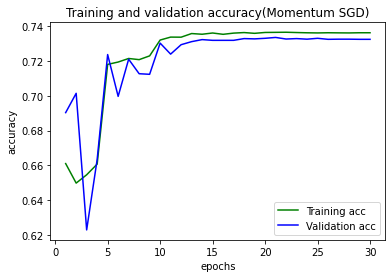

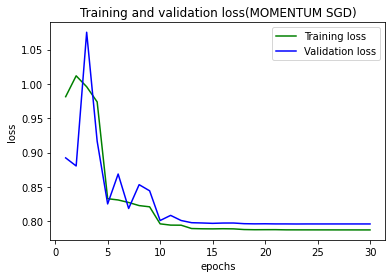

In [109]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy(Momentum SGD)')
plt.plot(epochs, acc, 'green', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.figure()
plt.title('Training and validation loss(MOMENTUM SGD)')
plt.plot(epochs, loss, 'green', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend()

plt.show()